In [61]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/hype-usp/PS-2023_1/main/Case/Avancado/data/train.csv")

# Baixar o dataset para uso offline
with open("titanic.pkl", "wb") as f:
    pickle.dump(df, f)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()
# Há um número imenso de valores faltantes na coluna de cabine, grandes demais para serem substituidos, além de ser um coluna com 
# pouco significado para o case, então será descartada (ele poderia ter mais relevância se viesse junto com alguma outra 
# coluna dando alguma referência quanto a localização da cabine no navio)

# Há uma quantidade considerável de idades faltando, mas podemos preencher usando medianas levando em conta outros atributos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.describe()
# Não há numeros errados no campo de survived (0,1)

# Não aparentam ter idades fora de um range crível

# Fare aparenta ter alguns outliers que valem a pena dar uma checada, uma vez que tem um pulo 
# muito grande do terceiro quartil para o valor máximo 



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Parch', ylabel='count'>

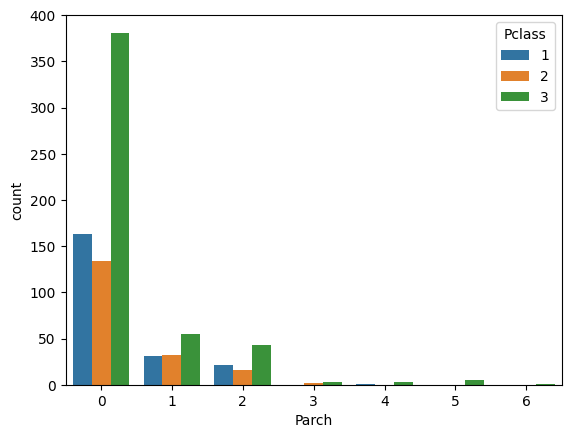

In [83]:
sns.countplot(df, x="Parch", hue="Pclass")

In [65]:
# Dropar a coluna de cabin, que possui muitos NAs e não tem tanta significância
# Dropar a coluna de Id e de nome já que não tem tanto uso para nós
df.drop(columns=["Cabin", "PassengerId"], inplace=True)

# Poderíamos dropar também a coluna Ticket, mas vamos mantê-la para fazer alguns testes para ver se ela tem alguma
# significância para predizer os sobreviventes 

In [66]:
# Só pra morrer de certeza que não tem valores fora de (0,1)
df.loc[(df['Survived'] < 1) & (df['Survived'] > 0)] # Nada, tudo ok

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


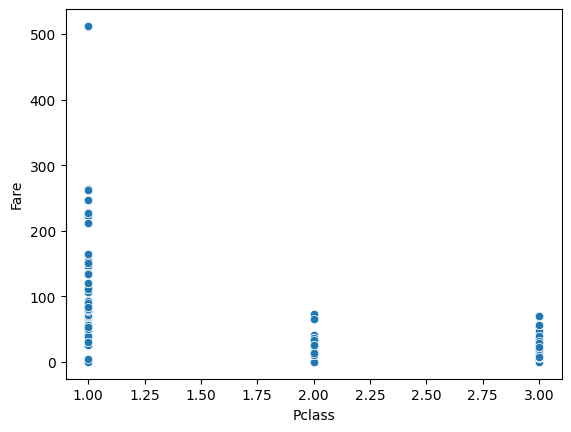

In [67]:
sns.scatterplot(df, x="Pclass", y="Fare");

# Como previsto, mesmo estando em classe alta, há um outlier que gostariamos de apagar

In [68]:
# Esses dois registros de 512 Dólares podem ser problema, para não ter que tirar o registro inteiro, 
# vamos substituir pela média dos tickets mais caros abaixo dos 512 
mean = df.loc[(df['Fare'] > 200) & (df['Fare'] < 300), "Fare"].median()
df.loc[(df['Fare'] > 500), "Fare"] = mean

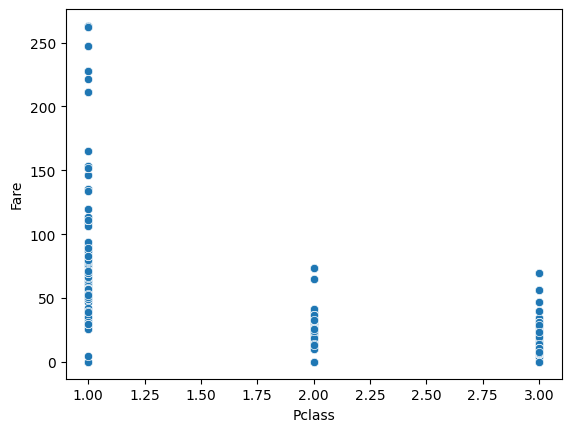

In [69]:
# Melhor!
sns.scatterplot(df, x="Pclass", y="Fare");

In [70]:
df['Sex'].value_counts() # Ok, sem erros

Sex
male      577
female    314
Name: count, dtype: int64

In [71]:
df['Embarked'].value_counts() # Maravilha, há uma ausência de incorretudes

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [78]:
# Poderiamos usar como um atributo categórico, mas seriam muitas colunas para um OneHot, mas para não perdermos os registros
# podemos fazer um label encoding
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

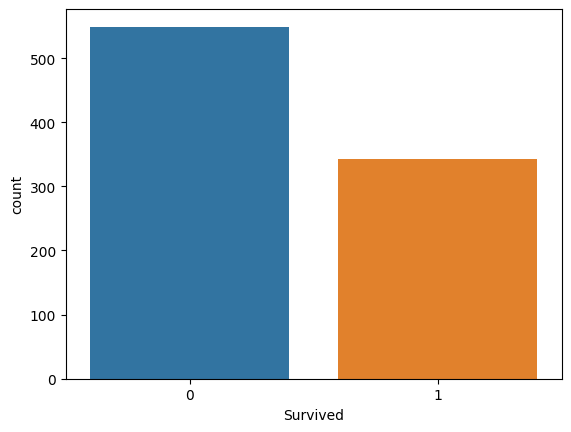

In [73]:
sns.countplot(df, x="Survived");

# Temos uma maior quantidade de pessoas que morreram do que sobreviveram (500+ para ~330) 


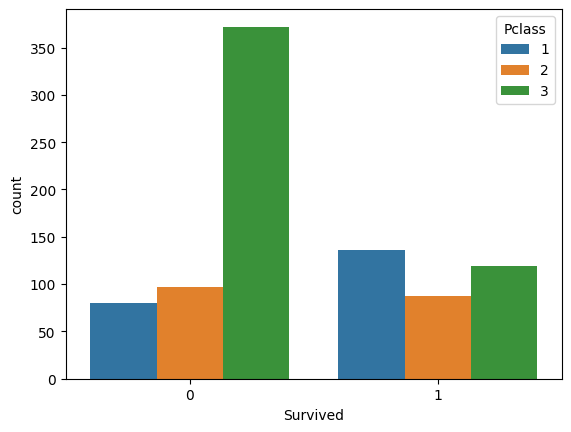

In [74]:
sns.countplot(df, x="Survived", hue="Pclass");

# Das classes, a que mais sobreviveram foram os de Classe A e os de Classe C
# Contudo, por serem em maior número (e possivelmente com menor prioridade), a Classe C foi a que teve maior número de mortes


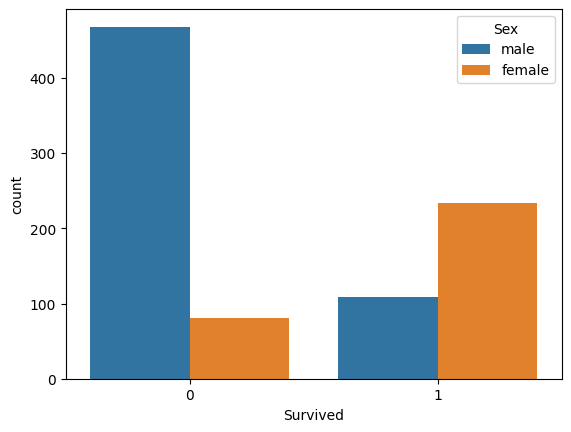

In [75]:
sns.countplot(df, x="Survived", hue="Sex");

# Mulheres foram as que mais sobreviveram, em comparação, os Homens tiveram mais mortes. 
# (Espero que nenhum deles sejam por falta de espaço numa porta salva-vidas)

In [85]:
df.head()

df.loc[df['Ticket'] == "113803"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
137,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,S


In [77]:
from sklearn.calibration import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


numerics = ['Age', 'Fare']
categories_one = [att for att in df.columns.tolist() if att not in numerics]
categories_lab = ['Ticket']
# vai ser usado um Label Encoding, e não um OneHot como o resto.
categories.remove()


df_num = df[numerics]

pipeline = Pipeline([
    ("imputer", IterativeImputer(random_state=42))
    ("normalize", RobustScaler())
])


pqoeoeoeoeoeoeeoeo = ColumnTransformer([
    ("one_hot", OneHotEncoder(), categories)
    ("label_enc", LabelEncoder(), "Ticket")
    ("")
])


SyntaxError: invalid syntax (661376909.py, line 8)